## Zero Coupon Curves on the Refinitiv Data Platform

A few examples of how to generate Zero Coupon curves with Instrument Pricing Analytics APIs - using the RDP Library


Opening an RDP platform session

In [1]:
import json
import refinitiv.dataplatform as rdp
import configparser as cp
from IPython.display import HTML
import pandas as pd

%run -i ./credentials.ipynb
%run "plotting_helper.ipynb"

In [2]:
session = rdp.PlatformSession(
    get_app_key(),
    rdp.GrantPassword(
        get_rdp_login(),
        get_rdp_password()
    )
)

session.open()

<State.Open: 3>

#### Define our API Endpoints for the ZC Curve definitions and ZC Curves data

In [3]:
zcCurveDefinitions_endpoint = rdp.Endpoint(session, 
    'https://api.refinitiv.com/data/quantitative-analytics-curves-and-surfaces/v1/curves/zc-curve-definitions')

zcCurve_endpoint = rdp.Endpoint(session, 
    'https://api.refinitiv.com/data/quantitative-analytics-curves-and-surfaces/v1/curves/zc-curves')

### Getting Curve Definitions
Request a list of Curve Definitions based on query parameters e.g Currency

In [4]:
request_body={
  "universe": [
    {
      "currency": "JPY"
    }
  ]
}

response = zcCurveDefinitions_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

df = pd.DataFrame(data=response.data.raw["data"][0]["curveDefinitions"])
df

,id,mainConstituentAssetClass,riskType,name,currency,indexName,source,firstHistoricalAvailabilityDate,availableTenors
0,a865716b-e437-4045-84b5-f6483d8b6a25,Swap,InterestRate,JPY TIBOR (EMEA) Swap ZC Curve,JPY,TIBOR (EMEA),Refinitiv,2015-08-13,"[1M, 3M, 6M, OIS]"
1,cbf84acf-5328-4efc-8d23-f476ac495d82,Swap,InterestRate,JPY LIBOR Swap ZC Curve,JPY,LIBOR,Refinitiv,2014-06-23,"[1M, 3M, 6M, OIS]"
2,e24f1a57-9007-4535-a4d7-b037662ace95,Swap,InterestRate,JPY TIBOR Swap ZC Curve,JPY,TIBOR,Refinitiv,2015-08-13,"[1M, 3M, 6M, OIS]"


#### Requesting a curve by its ID

In [5]:
request_body = {
    "universe": [
        {
            "curveDefinition": {
                "id": "a865716b-e437-4045-84b5-f6483d8b6a25",
                "discountingTenor": "1M"
            }
        }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

#### Detailed Response - curve points data - Definition + Parameters

In [6]:
print(json.dumps(response.data.raw, indent=2))

{
  "data": [
    {
      "curveDefinition": {
        "id": "a865716b-e437-4045-84b5-f6483d8b6a25",
        "mainConstituentAssetClass": "Swap",
        "riskType": "InterestRate",
        "name": "JPY TIBOR (EMEA) Swap ZC Curve",
        "currency": "JPY",
        "indexName": "TIBOR (EMEA)",
        "source": "Refinitiv",
        "firstHistoricalAvailabilityDate": "2015-08-13",
        "availableTenors": [
          "1M",
          "3M",
          "6M",
          "OIS"
        ],
        "discountingTenor": "1M"
      },
      "curveParameters": {
        "priceSide": "Mid",
        "interestCalculationMethod": "Dcb_Actual_Actual",
        "extrapolationMode": "None",
        "interpolationMode": "CubicDiscount",
        "useSteps": false,
        "useConvexityAdjustment": true,
        "convexityAdjustment": {
          "volatilityPercent": 0.149,
          "meanReversionPercent": -6.3813
        },
        "useMultiDimensionalSolver": true,
        "calendarAdjustment": "Calendar"

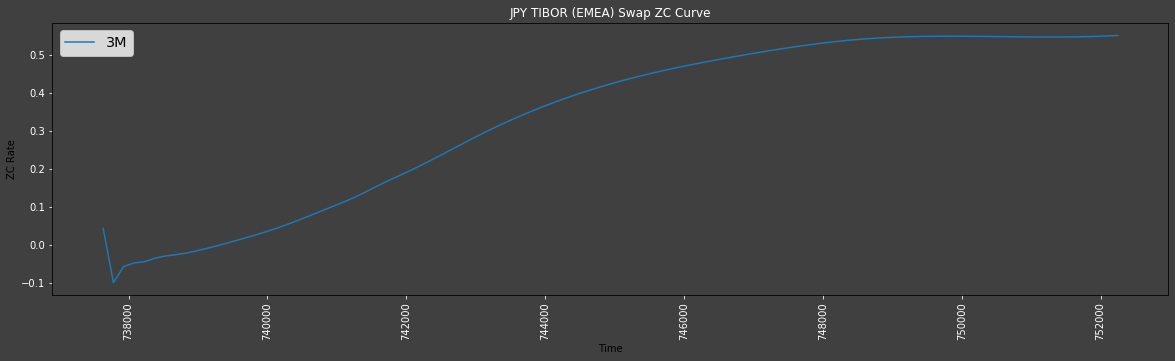

In [7]:
plot_zc_curves(response.data.raw['data'][0], ['3M'])

#### Getting our Curve points into a Dataframe

In [8]:
curves = response.data.raw['data'][0]["curves"]["3M"]["curvePoints"]
pd.DataFrame(data=curves)

,startDate,endDate,ratePercent,discountFactor,tenor,instruments
0,2020-07-29,2020-07-29,0.042504,1.000000,0D,NaN
1,2020-07-29,2020-08-07,0.042504,0.999990,1W,[{'instrumentCode': 'ZTIJPY1WD='}]
2,2020-07-29,2020-08-31,0.103786,0.999906,1M,[{'instrumentCode': 'ZTIJPY1MD='}]
3,2020-07-29,2020-10-30,-0.064437,1.000164,3M,[{'instrumentCode': 'ZTIJPY3MD='}]
4,2020-07-29,2021-01-29,-0.058941,1.000296,6M,[{'instrumentCode': 'JPAM3T6M=TRDT'}]
5,2020-07-29,2021-04-30,-0.055259,1.000417,9M,[{'instrumentCode': 'JPAM3T9M=TRDT'}]
6,2020-07-29,2021-07-30,-0.052861,1.000530,1Y,[{'instrumentCode': 'JPAM3T1Y=TRDT'}]
7,2020-07-29,2022-01-31,-0.046714,1.000705,1Y6M,[{'instrumentCode': 'JPAM3T18M=TRDT'}]
8,2020-07-29,2022-07-29,-0.036612,1.000733,2Y,[{'instrumentCode': 'JPAM3T2Y=TRDT'}]
9,2020-07-29,2023-07-31,-0.025271,1.000760,3Y,[{'instrumentCode': 'JPAM3T3Y=TRDT'}]


#### Requesting Curve using Parameters 
An alternative to using the Curve ID

In [9]:
request_body={
    "universe": [
    {
        "curveParameters": {
            "valuationDate":"2020-06-30",
            "interpolationMode": "CubicSpline",
            "priceSide": "Mid",
            "interestCalculationMethod": "Dcb_Actual_Actual",
            "extrapolationMode": "Linear"
        },
        
        "curveDefinition": {
            "currency": "JPY",
            "indexName":"LIBOR",
            "discountingTenor": "OIS",
            "indexTenors":["6M"]
        }
    }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

print(json.dumps(response.data.raw, indent=2))

{
  "data": [
    {
      "curveDefinition": {
        "id": "cbf84acf-5328-4efc-8d23-f476ac495d82",
        "mainConstituentAssetClass": "Swap",
        "riskType": "InterestRate",
        "name": "JPY LIBOR Swap ZC Curve",
        "currency": "JPY",
        "indexName": "LIBOR",
        "source": "Refinitiv",
        "firstHistoricalAvailabilityDate": "2014-06-23",
        "availableTenors": [
          "1M",
          "3M",
          "6M",
          "OIS"
        ],
        "discountingTenor": "OIS",
        "indexTenors": [
          "6M"
        ]
      },
      "curveParameters": {
        "priceSide": "Mid",
        "interestCalculationMethod": "Dcb_Actual_Actual",
        "extrapolationMode": "Linear",
        "interpolationMode": "CubicSpline",
        "useSteps": false,
        "useConvexityAdjustment": true,
        "convexityAdjustment": {
          "volatilityPercent": 0.141,
          "meanReversionPercent": -6.5846
        },
        "useMultiDimensionalSolver": true,
  

#### Implied Foreign Currencies / Currency Adjusted ZC Curves


In [10]:
request_body={
    "universe": [
        {
            "curveDefinition": {
                "currency":"JPY",
                "indexName":"LIBOR",
                "discountingTenor": "6M",
                "referenceCurveDefinition": {
                    "currency":"USD",
                    "indexName":"LIBOR",
                    "mainConstituentAssetClass":"Swap",
                    "discountingTenor": "6M",
                }
            }            
        }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)


### Taking collateral currency into account

In [11]:
request_body={
    "universe": [
        {
            "curveDefinition": {
                "currency":"JPY",
                "indexName":"LIBOR",
                "discountingTenor": "OIS",
                "pivotCurveDefinition":{
                    "currency":"USD",
                    "indexName":"LIBOR",
                    "mainConstituentAssetClass":"Swap",
                    "discountingTenor": "OIS"
                },
                "referenceCurveDefinition": {
                    "currency":"EUR",
                    "indexName":"EURIBOR",
                    "discountingTenor": "OIS"
                }
            }           
        }]
}

response = zcCurve_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body
)

In [12]:
curves = response.data.raw['data'][0]["curves"]["OIS"]["curvePoints"]
pd.DataFrame(data=curves)

,startDate,endDate,ratePercent,discountFactor,tenor
0,2020-07-29,2020-07-29,-0.175727,1.000000,0D
1,2020-07-29,2020-08-07,-0.175727,1.000043,1W
2,2020-07-29,2020-08-31,-0.130125,1.000117,1M
3,2020-07-29,2020-09-30,-0.120838,1.000208,2M
4,2020-07-29,2020-10-30,-0.170221,1.000433,3M
5,2020-07-29,2021-01-29,-0.268428,1.001352,6M
6,2020-07-29,2021-04-30,-0.283697,1.002143,9M
7,2020-07-29,2021-07-29,-0.289940,1.002908,1Y
8,2020-07-29,2022-07-29,-0.722420,1.014606,2Y
9,2020-07-29,2023-07-31,-0.386078,1.011694,3Y


### Interest Rate swap examples
Using the Financial Contracts API

In [16]:
financial_contract_endpoint = rdp.Endpoint(session, 
            'https://api.refinitiv.com/data/quantitative-analytics/v1/financial-contracts')

 A vanilla AUD Interest Rate Swap based on the BBSW index

In [17]:
request_body = {
    
    "fields" : ["InstrumentTag","MarketValueInDealCcy","DirtyPricePercent","FixedRatePercent","DiscountCurveName","ForwardCurveName","ErrorCode","ErrorMessage"],
    
    "universe" : [
        {
            "instrumentType":"Swap",
            "instrumentDefinition": {
                "instrumentTag":"IRS-AUD BBSW 3M - 2Y",
                "startDate":"2020-07-29",
                "tenor":"5Y",
                "legs":[
                {
                    "direction":"Paid",
                    "interestType":"Fixed",
                    "notionalCcy":"AUD",
                    "interestPaymentFrequency":"Annual",
                    "interestCalculationMethod":"Dcb_Actual_365",
                },
                {
                    "direction":"Received",
                    "interestType":"Float",
                    "interestPaymentFrequency":"SemiAnnual",
                    "interestCalculationMethod":"Dcb_Actual_365",
                    "notionalCcy":"AUD",
                    "indexName":"BBSW",
                    "indexTenor":"6M",
                }]
            }
        }],
    
    "pricingParameters": {
        "valuationDate": "2020-7-27T00:00:00Z",
    },
        
    "outputs" : ["Data","Headers"],

}

response = financial_contract_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body)

print(json.dumps(response.data.raw, indent=2))

{
  "headers": [
    {
      "type": "String",
      "name": "InstrumentTag"
    },
    {
      "type": "Float",
      "name": "MarketValueInDealCcy"
    },
    {
      "type": "Float",
      "name": "DirtyPricePercent"
    },
    {
      "type": "Float",
      "name": "FixedRatePercent"
    },
    {
      "type": "String",
      "name": "DiscountCurveName"
    },
    {
      "type": "String",
      "name": "ForwardCurveName"
    },
    {
      "type": "String",
      "name": "ErrorCode"
    },
    {
      "type": "String",
      "name": "ErrorMessage"
    }
  ],
  "data": [
    [
      "IRS-AUD BBSW 3M - 2Y",
      18380.5652024736,
      1.83805652024736,
      0.370641356748756,
      "AUD - Swap vs 6M BBSW",
      null,
      "",
      ""
    ],
    [
      "IRS-AUD BBSW 3M - 2Y",
      18380.5891231962,
      1.83805891231962,
      null,
      "AUD - Swap vs 6M BBSW",
      "AUD - Swap vs 6M BBSW",
      "",
      ""
    ]
  ]
}


In [18]:
headers_name = [h['name'] for h in response.data.raw['headers']]
pd.DataFrame(data=response.data.raw['data'], columns=headers_name)

,InstrumentTag,MarketValueInDealCcy,DirtyPricePercent,FixedRatePercent,DiscountCurveName,ForwardCurveName,ErrorCode,ErrorMessage
0,IRS-AUD BBSW 3M - 2Y,18380.565202,1.838057,0.370641,AUD - Swap vs 6M BBSW,None,,
1,IRS-AUD BBSW 3M - 2Y,18380.589123,1.838059,NaN,AUD - Swap vs 6M BBSW,AUD - Swap vs 6M BBSW,,


Currency Basis Swap USD / JPY - a fixed USD leg vs. a 6M JPY Libor leg

In [19]:
request_body = {
    
    "fields" : ["InstrumentTag","CleanMarketValueInDealCcy","MarketValueInDealCcy","AccruedAmountInDealCcy",\
                "AccruedPercent","CleanPricePercent","DirtyPricePercent","CleanPricePercent","PV01Bp",\
                "PV01AmountInDealCcy","DiscountCurveName","ForwardCurveName","ErrorCode","ErrorMessage"],
    
    "universe" : [
    {
        "instrumentType":"Swap",
        "instrumentDefinition": {
            "instrumentTag":"CCS-USD 1 EURIBOR-2Y",
            "startDate":"2019-10-28",
            "tenor":"5Y",
            "legs":[
            {
                "direction":"Paid",
                "interestType":"Fixed",
                "fixedRatePercent":3.072,
                "notionalCcy":"USD",
                "interestPaymentFrequency":"SemiAnnual",
                "interestCalculationMethod":"Dcb_30_360",
            },
            {
                "direction":"Received",
                "interestType":"Float",
                "interestPaymentFrequency":"SemiAnnual",
                "interestCalculationMethod":"Dcb_Actual_360",
                "notionalCcy":"JPY",
                "indexName":"LIBOR",
                "indexTenor":"6M",
            }]
        }
    }],
    
    "pricingParameters": {
        "valuationDate": "2020-01-18T00:00:00Z",
        
    },
        
    "outputs" : ["Data","Headers"],

}

response = financial_contract_endpoint.send_request(
    method = rdp.Endpoint.RequestMethod.POST,
    body_parameters = request_body)

print(json.dumps(response.data.raw, indent=2))

{
  "headers": [
    {
      "type": "String",
      "name": "InstrumentTag"
    },
    {
      "type": "Float",
      "name": "CleanMarketValueInDealCcy"
    },
    {
      "type": "Float",
      "name": "MarketValueInDealCcy"
    },
    {
      "type": "Float",
      "name": "AccruedAmountInDealCcy"
    },
    {
      "type": "Float",
      "name": "AccruedPercent"
    },
    {
      "type": "Float",
      "name": "CleanPricePercent"
    },
    {
      "type": "Float",
      "name": "DirtyPricePercent"
    },
    {
      "type": "Float",
      "name": "CleanPricePercent"
    },
    {
      "type": "Float",
      "name": "PV01Bp"
    },
    {
      "type": "Float",
      "name": "PV01AmountInDealCcy"
    },
    {
      "type": "String",
      "name": "DiscountCurveName"
    },
    {
      "type": "String",
      "name": "ForwardCurveName"
    },
    {
      "type": "String",
      "name": "ErrorCode"
    },
    {
      "type": "String",
      "name": "ErrorMessage"
    }
  ],
  "data"

In [20]:
headers_name = [h['name'] for h in response.data.raw['headers']]
pd.DataFrame(data=response.data.raw['data'], columns=headers_name)

,InstrumentTag,CleanMarketValueInDealCcy,MarketValueInDealCcy,AccruedAmountInDealCcy,AccruedPercent,CleanPricePercent,DirtyPricePercent,CleanPricePercent,PV01Bp,PV01AmountInDealCcy,DiscountCurveName,ForwardCurveName,ErrorCode,ErrorMessage
0,CCS-USD 1 EURIBOR-2Y,1.062845e+06,1.069672e+06,6826.666667,0.682667,106.284527,106.967194,106.284527,4.692462,469.246221,USD 6M disc. USD curve,None,,
1,CCS-USD 1 EURIBOR-2Y,1.067543e+06,1.069675e+06,2131.823095,0.213182,106.754321,106.967503,106.754321,0.463324,5103.750880,USD 6M disc. JPY curve,"JPY 6M disc. JPY curve, 6M index tenor",,
